In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn import under_sampling
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization, Flatten,Conv1D,
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
# print first 10 rows in a dataframe
print(data.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [4]:
# print the information about the columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# describe the dataset
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
# checking for a missing values
print(data.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64


In [7]:
#drop the Time column
data.drop('Time',axis = 1, inplace = True)

# define x and y(Features and target)
X = data.drop('class',axis = 1).values
Y = data['class']

In [13]:
# print the each class counts
print(Y.value_counts())

0    284315
1       492
Name: class, dtype: int64


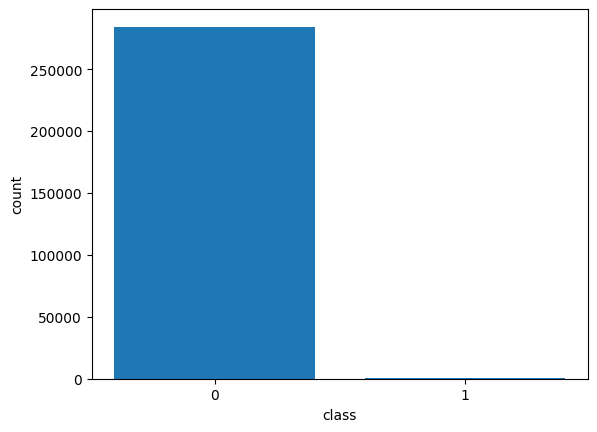

In [20]:
# plot the distribution of the class
plt.bar(Y.unique(),Y.value_counts())
plt.xlabel("class")
plt.ylabel("count")
plt.xticks([0, 1])
plt.show()

In [16]:
# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# perform unser sampling to get the balanced data
sampler = under_sampling.RandomUnderSampler(random_state = 42, sampling_strategy=1)
X_sampled, Y_sampled = sampler.fit_resample(X, Y)

In [18]:
# print the each class counts
print(Y_sampled.value_counts())

0    492
1    492
Name: class, dtype: int64


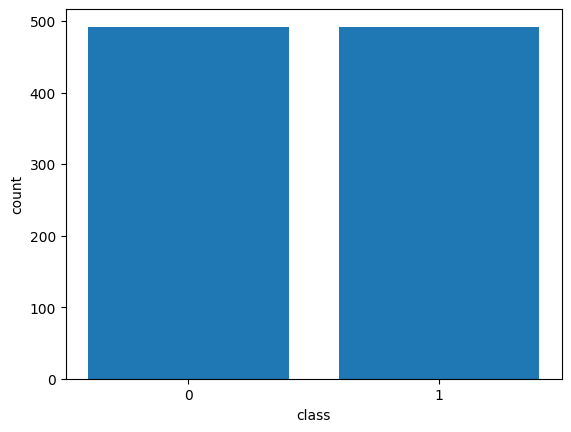

In [21]:
# plot the distribution of the class
plt.bar(Y_sampled.unique(),Y_sampled.value_counts())
plt.xlabel("class")
plt.ylabel("count")
plt.xticks([0, 1])
plt.show()

# FNN model:

In [23]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, Y_sampled, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(688, 29) (688,)
(296, 29) (296,)


In [24]:
# define the simple feedforward neural network(FNN) model
FNN_model = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(2, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [25]:
# compile the model
FNN_model.compile(optimizer =Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# model summary
print(FNN_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [27]:
# train the model using training set
FNN_model.fit(X_train, y_train, epochs = 30, batch_size =32,verbose = 'auto', validation_data = (X_test, y_test))

Epoch 1/30
22/22 [==============================] - 1s 15ms/step - loss: 0.5975 - accuracy: 0.6468 - val_loss: 0.5146 - val_accuracy: 0.6791
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.8009 - val_loss: 0.4271 - val_accuracy: 0.8446
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.9070 - val_loss: 0.4056 - val_accuracy: 0.9155
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.9404 - val_loss: 0.3962 - val_accuracy: 0.9189
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.9433 - val_loss: 0.3938 - val_accuracy: 0.9155
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.3610 - accuracy: 0.9549 - val_loss: 0.3867 - val_accuracy: 0.9257
Epoch 7/30
22/22 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.9564 - val_loss: 0.3867 - val_accuracy: 0.9257
Epoch 8/30
22/22 [=

In [28]:
# evaluate the model using the testing set and training set
train_loss, train_accuracy = FNN_model.evaluate(X_train, y_train)
test_loss, test_accuracy = FNN_model.evaluate(X_test, y_test)
print("FNN model Train Loss     : ", round(train_loss,4))
print("FNN model Test Loss      : ", round(test_loss,4))
print("FNN model Train Accuracy : ", round(train_accuracy,4))
print("FNN model Test Accuracy  : ", round(test_accuracy,4))

10/10 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.9189
FNN model Train Loss     :  0.2251
FNN model Test Loss      :  0.4633
FNN model Train Accuracy :  0.9869
FNN model Test Accuracy  :  0.9189


In [29]:
# classification report
pred = FNN_model.predict(X_test)
print(classification_report(y_test, pred.round()))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.92      0.92       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



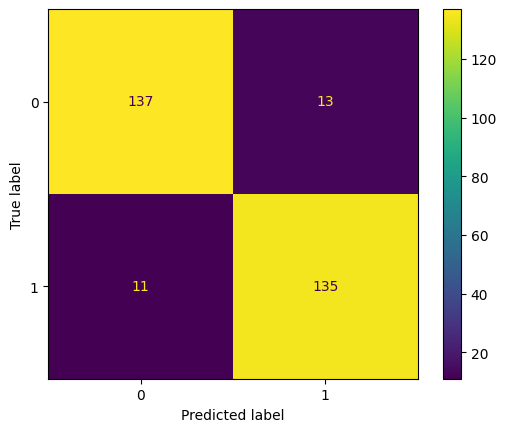

In [30]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, pred.round())
ConfusionMatrixDisplay(confusion_matrix= conf_matrix).plot()
plt.show()

# CNN:

In [ ]:
# reshape the features for CNN model
X_sampled = X_sampled.reshape(X_sampled.shape[0], X_sampled.shape[1],1)

In [ ]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, Y_sampled, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(688, 29, 1) (688,)
(296, 29, 1) (296,)


In [ ]:
# Define the CNN model
CNN_model =  Sequential([
    Conv1D(64,2,activation = 'relu', input_shape = (X_train[0].shape)),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(128,2,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
    ])

In [ ]:
# print the model summary
print(CNN_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            192       
                                                                 
 batch_normalization (BatchN  (None, 28, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 128)           16512     
                                                                 
 batch_normalization_1 (Batc  (None, 27, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 27, 128)          

In [ ]:
# compile the model
CNN_model.compile(optimizer =Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model using the training set and validating using the testing set
CNN_model.fit(X_train, y_train, epochs = 30, batch_size =32, verbose= 'auto', validation_data = (X_test, y_test))

Epoch 1/30
22/22 [==============================] - 1s 66ms/step - loss: 0.1005 - accuracy: 0.9666 - val_loss: 0.2025 - val_accuracy: 0.9324
Epoch 2/30
22/22 [==============================] - 1s 51ms/step - loss: 0.0887 - accuracy: 0.9666 - val_loss: 0.2023 - val_accuracy: 0.9358
Epoch 3/30
22/22 [==============================] - 1s 37ms/step - loss: 0.0855 - accuracy: 0.9724 - val_loss: 0.2057 - val_accuracy: 0.9358
Epoch 4/30
22/22 [==============================] - 1s 36ms/step - loss: 0.0723 - accuracy: 0.9738 - val_loss: 0.2098 - val_accuracy: 0.9358
Epoch 5/30
22/22 [==============================] - 1s 37ms/step - loss: 0.0803 - accuracy: 0.9709 - val_loss: 0.2089 - val_accuracy: 0.9324
Epoch 6/30
22/22 [==============================] - 1s 37ms/step - loss: 0.0745 - accuracy: 0.9767 - val_loss: 0.2121 - val_accuracy: 0.9358
Epoch 7/30
22/22 [==============================] - 1s 32ms/step - loss: 0.0746 - accuracy: 0.9724 - val_loss: 0.2115 - val_accuracy: 0.9324
Epoch 8/30
22

In [ ]:
# evaluate the model
train_loss, train_accuracy = CNN_model.evaluate(X_train, y_train)
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test)
print("CNN model Train Loss     : ", round(train_loss,4))
print("CNN model Test Loss      : ", round(test_loss,4))
print("CNN model Train Accuracy : ", round(train_accuracy,4))
print("CNN model Test Accuracy  : ", round(test_accuracy,4))

10/10 [==============================] - 0s 16ms/step - loss: 0.2310 - accuracy: 0.9291
CNN model Train Loss     :  0.0237
CNN model Test Loss      :  0.231
CNN model Train Accuracy :  0.9956
CNN model Test Accuracy  :  0.9291


In [ ]:
# classification report
pred = CNN_model.predict(X_test)
print(classification_report(y_test, pred.round()))

10/10 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.94      0.91      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



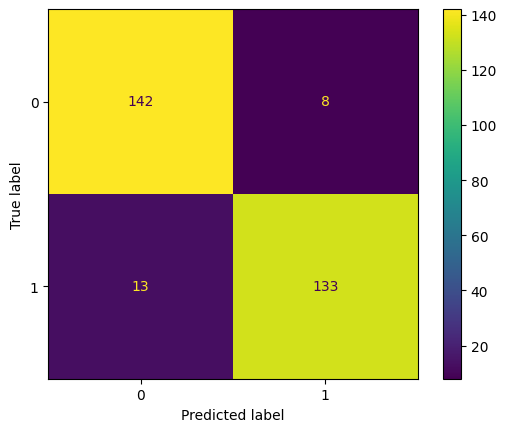

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, pred.round())
ConfusionMatrixDisplay(confusion_matrix= conf_matrix).plot()
plt.show()